In [2]:
import pandas as pd
import numpy as np

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default.
sns.set_style("darkgrid") # set a grey grid as a background

# turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('TensorFlow_FILES/DATA/kc_house_data.csv')

### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# find missing points in the dataset, per column. Zeroes (falses) indicate no missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
# trying to suppress scientific notation
pd.options.display.float_format = '{:.2f}'.format

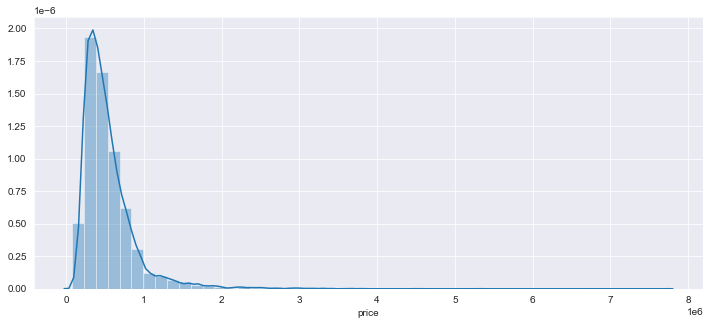

In [9]:
# visualizing the EDA. distplot() works for continuously labelled data 
plt.figure(figsize=(12,5))
sns.distplot(df.price)

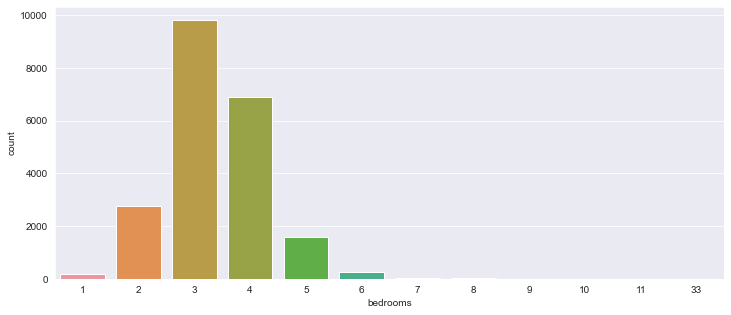

In [10]:
# analyze bedrooms - this is quasi-continuous - there won't be 1.5 bedrooms in the way you might have 1.5 bathrooms
# this is better as a countplot
# notice that the scale goes all the way up to 33, but doesn't show, so there's probably 1 of them
plt.figure(figsize=(12,5))
sns.countplot(df.bedrooms)

In [11]:
# see if labels have features that might intuitively have a high correlation
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.51,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.16,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.51,1.00,0.76,0.09,0.50,0.06,0.19,-0.13,0.67,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.76,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.00,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.00,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.13,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.15,-0.16,0.17,-0.36,-0.06,0.00,-0.02,-0.11,-0.09,-0.00


In [12]:
# test the correlation individual labels
df.corr()['price'].sort_values()

zipcode         -0.05
id              -0.02
long             0.02
condition        0.04
yr_built         0.05
sqft_lot15       0.08
sqft_lot         0.09
yr_renovated     0.13
floors           0.26
waterfront       0.27
lat              0.31
bedrooms         0.31
sqft_basement    0.32
view             0.40
bathrooms        0.53
sqft_living15    0.59
sqft_above       0.61
grade            0.67
sqft_living      0.70
price            1.00
Name: price, dtype: float64

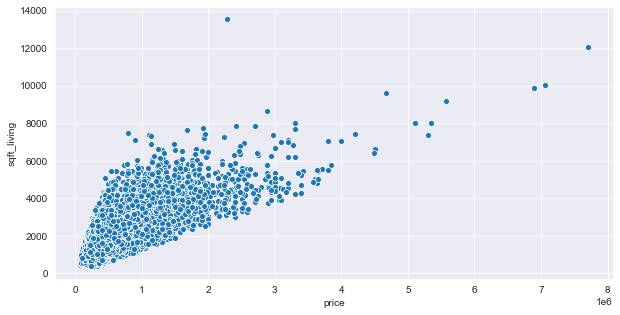

In [13]:
# now test the highly correlated labels with a scatterplot
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

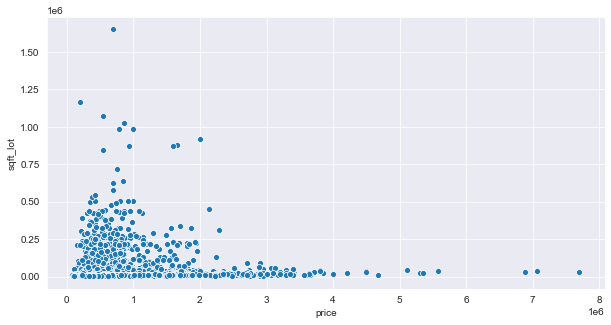

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_lot',data=df)

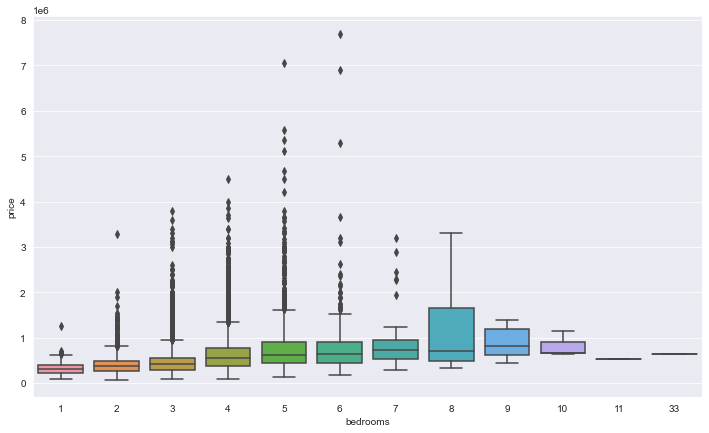

In [15]:
# digging into label differences using a boxplot to see the distribution of prices per # of bedrooms
# notice that since the number of houses with 3-7 bedrooms is much larger (from the countplot)
# it makes sense that the price variation would be more diverse, especially at the upper end#
plt.figure(figsize=(12,7))
sns.boxplot(x='bedrooms',y='price',data=df)

In [16]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

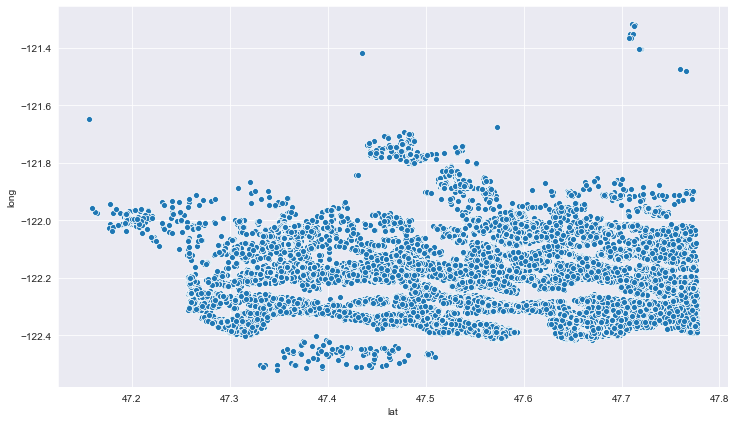

In [17]:
# can we get more information from the lat/lon without using geographical mapping?
# using lat, then long there are shapes but not intuitive
plt.figure(figsize=(12,7))
sns.scatterplot(x='lat',y='long',data=df)

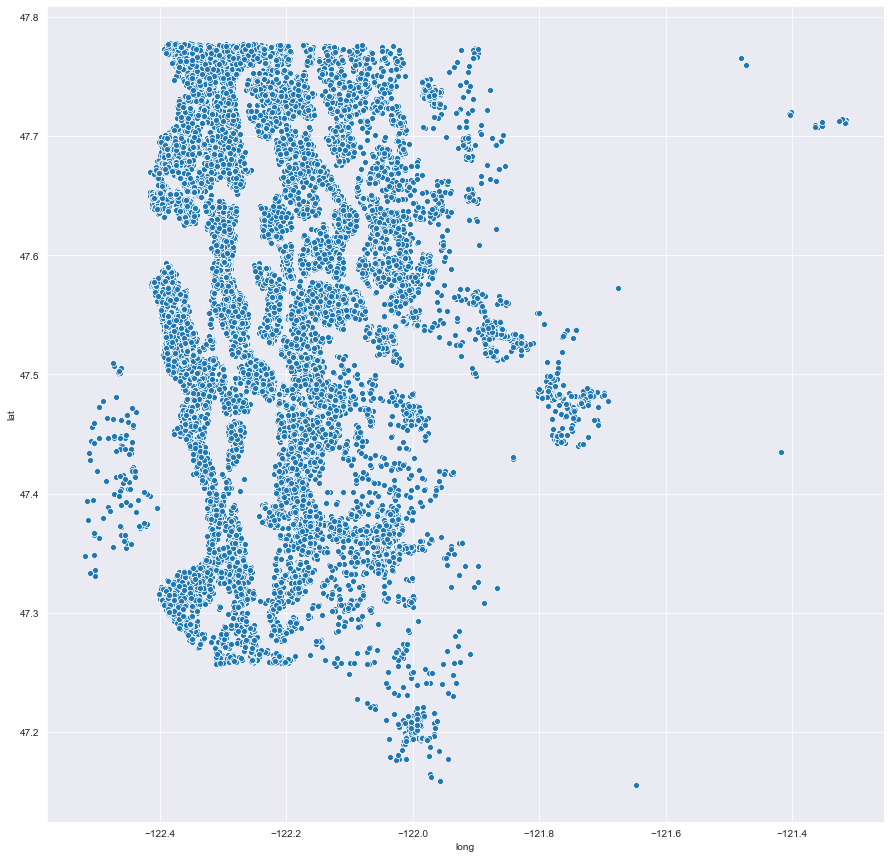

In [18]:
# change that to long/lat and this looks like a map of Seattle/King Co.
# you can see Elliott Bay, Lake Washington, Mercer Island, etc
plt.figure(figsize=(15,15))
sns.scatterplot(x='long',y='lat',data=df)

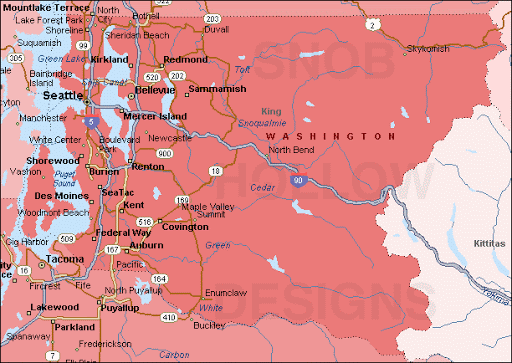

In [19]:
from IPython.display import Image
Image("king_county.gif")

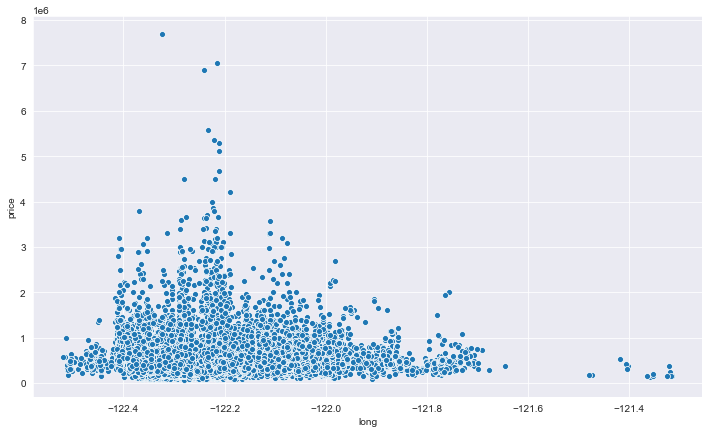

In [20]:
# how about feature comparison with price and longitude?
# we definitely see price spikes based on a particular longitude
plt.figure(figsize=(12,7))
sns.scatterplot(x='long',y='price',data=df)

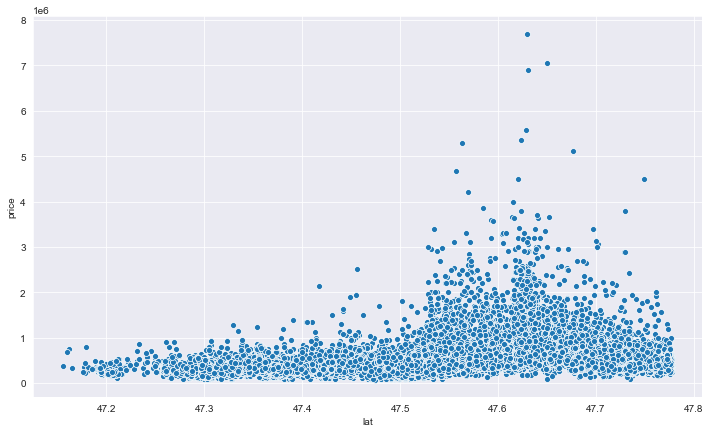

In [21]:
# how about latitude
plt.figure(figsize=(12,7))
sns.scatterplot(x='lat',y='price',data=df)

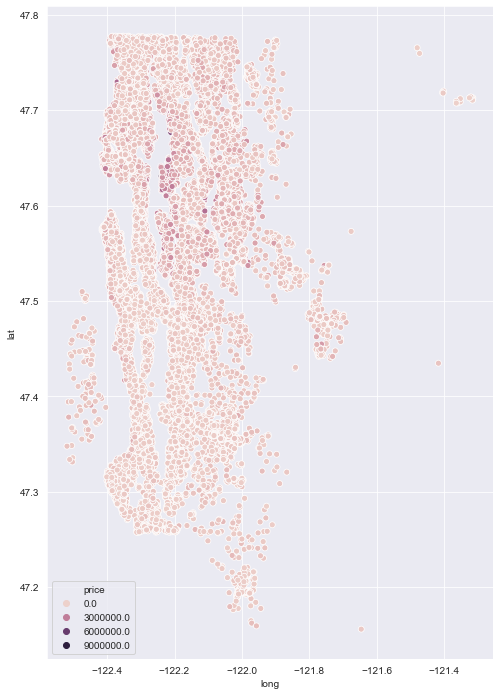

In [22]:
# using hue to add the pricing dimension in one diagram
# notice how longitude -122.2, latitude 47.64 is Bellevue with the highest prices
# this matches the lat and long to price examples
# Also note that the outliers skew the colormap so that only they show up as the darkest
plt.figure(figsize=(8,12))
sns.scatterplot(x='long',y='lat',data=df, hue='price',cmap='plasma')

In [23]:
# this will show the top 20 most expensive houses
# notice that the highest outliers drop off quickly.
# The earlier distplot indicates that the bulk of the houses are below 3million
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.00,6,8.00,12050,27600,2.50,0,3,...,13,8570,3480,1910,1987,98102,47.63,-122.32,3940,8800
3910,9808700762,6/11/2014,7060000.00,5,4.50,10040,37325,2.00,1,2,...,11,7680,2360,1940,2001,98004,47.65,-122.21,3930,25449
9245,9208900037,9/19/2014,6890000.00,6,7.75,9890,31374,2.00,0,4,...,13,8860,1030,2001,0,98039,47.63,-122.24,4540,42730
4407,2470100110,8/4/2014,5570000.00,5,5.75,9200,35069,2.00,0,0,...,13,6200,3000,2001,0,98039,47.63,-122.23,3560,24345
1446,8907500070,4/13/2015,5350000.00,5,5.00,8000,23985,2.00,0,4,...,12,6720,1280,2009,0,98004,47.62,-122.22,4600,21750
1313,7558700030,4/13/2015,5300000.00,6,6.00,7390,24829,2.00,1,4,...,12,5000,2390,1991,0,98040,47.56,-122.21,4320,24619
1162,1247600105,10/20/2014,5110000.00,5,5.25,8010,45517,2.00,1,4,...,12,5990,2020,1999,0,98033,47.68,-122.21,3430,26788
8085,1924059029,6/17/2014,4670000.00,5,6.75,9640,13068,1.00,1,4,...,12,4820,4820,1983,2009,98040,47.56,-122.21,3270,10454
2624,7738500731,8/15/2014,4500000.00,5,5.50,6640,40014,2.00,1,4,...,12,6350,290,2004,0,98155,47.75,-122.28,3030,23408
8629,3835500195,6/18/2014,4490000.00,4,3.00,6430,27517,2.00,0,0,...,12,6430,0,2001,0,98004,47.62,-122.22,3720,14592


In [24]:
# we can sample out the top %1 to give a better view of the bulk of the rest of the pricing
# how many is 1%?
len(df)* .01

215.97

In [25]:
# so we're create a new df for the bottom 99%, sampling from the sorted set after row 216
df_99 = df.sort_values('price',ascending=False).iloc[216:].copy()

In [26]:
df_99.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.00,4,3.50,4370,8510,2.00,0,1,...,10,3610,760,2003,0,98004,47.59,-122.20,2960,10347
12271,1923000260,10/15/2014,1960000.00,5,4.50,6200,23373,3.00,0,1,...,11,5050,1150,1988,0,98040,47.56,-122.22,3700,14486
9166,3124059023,2/13/2015,1960000.00,3,1.75,3330,12566,1.00,1,4,...,8,1940,1390,1960,0,98040,47.53,-122.22,3730,16560
12565,2806300065,4/22/2015,1960000.00,4,4.00,4430,31353,2.00,0,0,...,12,4430,0,1998,0,98005,47.64,-122.16,3900,35237
1150,4055701200,4/21/2015,1960000.00,4,2.75,3120,7898,1.00,1,4,...,8,1560,1560,1963,0,98034,47.72,-122.26,2630,13868


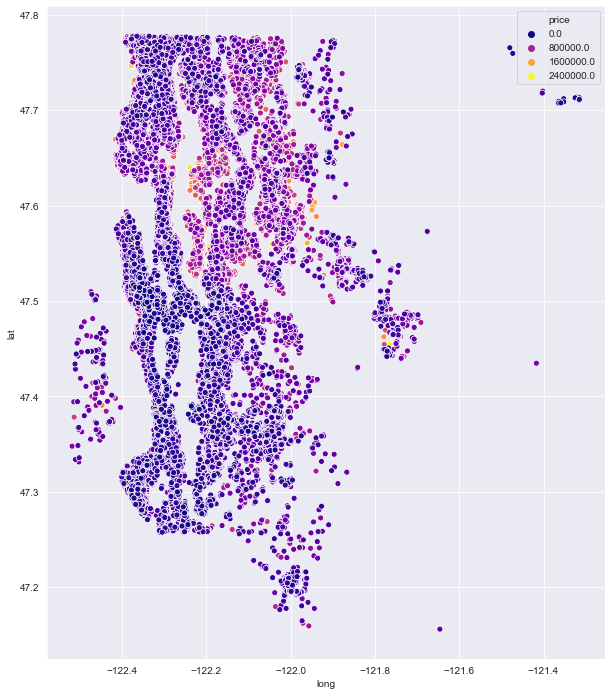

In [27]:
plt.figure(figsize=(10,12))
sns.scatterplot(x='long',y='lat',data=df_99, hue='price',palette='plasma')

In [28]:
# now try 95%
len(df)* .05

1079.8500000000001

In [29]:

df_95 = df.sort_values('price',ascending=False).iloc[1080:].copy()

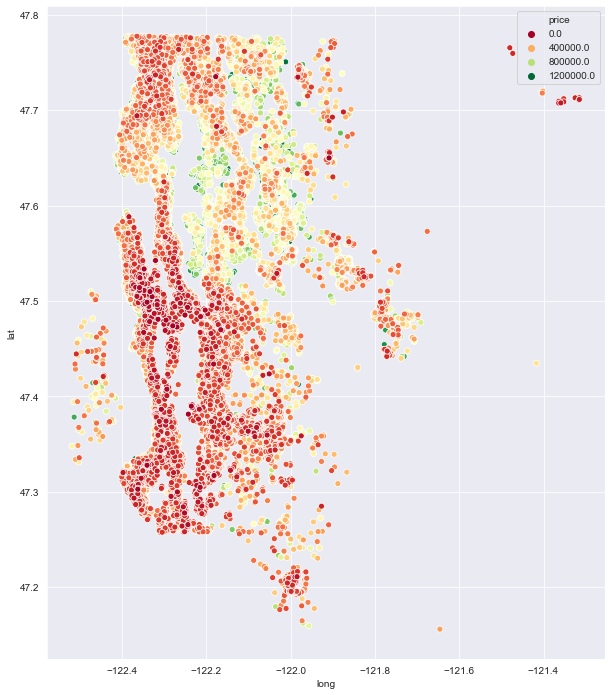

In [30]:
# a little more detail at 95% - lighten up the hotness
plt.figure(figsize=(10,12))
sns.scatterplot(x='long',y='lat',data=df_95, hue='price',palette='RdYlGn')

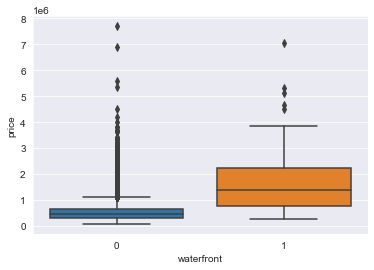

In [31]:
# noticing that a price goes up near the waterfront - use a boxplot to confirm that visual intuition
sns.boxplot(x='waterfront',y='price',data=df)

**now to clean up the columns and add feature engineering**

In [32]:
# get rid of the ID - it's not meaningful 
df = df.drop('id',axis=1)

In [33]:
# convert date to datetime
df.date = pd.to_datetime(df.date)

In [34]:
# extracting items from datetime
df['date'].apply(lambda date: date.year).iloc[0], df['date'].apply(lambda date: date.month).iloc[0], df['date'].apply(lambda date: date.day).iloc[0]

(2014, 10, 13)

In [35]:
# add columns for year and month
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [36]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,...,0,1955,0,98178,47.51,-122.26,1340,5650,2014,10
1,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,...,400,1951,1991,98125,47.72,-122.32,1690,7639,2014,12
2,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,...,0,1933,0,98028,47.74,-122.23,2720,8062,2015,2


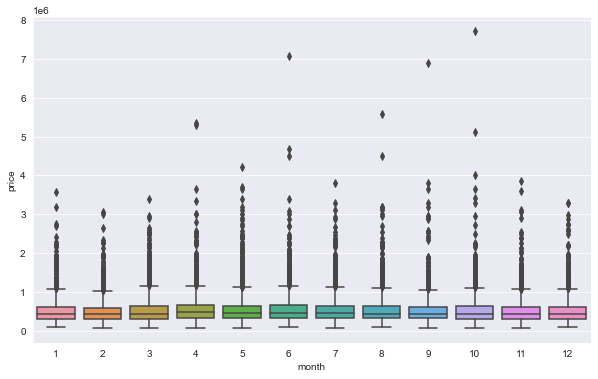

In [38]:
# is there variation based on month?
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

In [39]:
df.groupby('month').mean().price

month
1    525963.25
2    508520.05
3    544057.68
4    562215.62
5    550849.75
6    557534.32
7    544892.16
8    536655.21
9    529723.52
10   539439.45
11   522359.90
12   524799.90
Name: price, dtype: float64

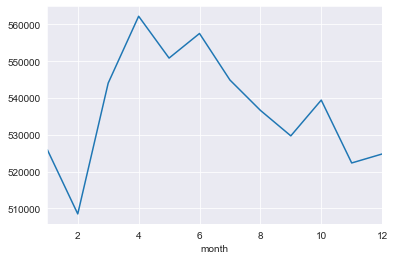

In [40]:
df.groupby('month').mean().price.plot()

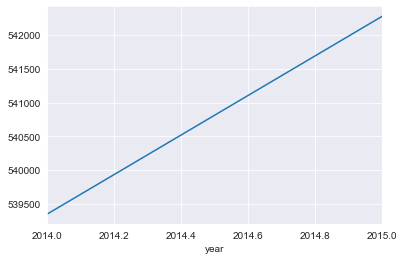

In [41]:
# showing by year
df.groupby('year').mean().price.plot()

In [42]:
# dropping off date since this analysis only cares about year and month. Save space and execution time
df = df.drop('date',axis=1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
year             21597 non-null int64
month            21597 non-null int64
dtypes: float64(5), int64(16)
memory usage: 3.5 MB


In [49]:
# notice that zip code is numeric - this could lead a model to misinterpret that as continuous data
# you could run a correlation to see if there's a design mapping of zip to latitude or longitude
# that may make it meaningful, but by reviewing a map of king county zip codes there doesn't appear to be a link
# this could be better to make a categorical variable
# How many zip codes are there? 70. Consider whether or not whether these are important to have in the model
len(df.zipcode.value_counts())
#

70

In [50]:
# in this case we'll drop zip codes
df = df.drop('zipcode',axis=1)

In [54]:
# is year_renovated important?
# most of the values are zero - so not much useful as rich data for the whole dataset
df.yr_renovated.value_counts()[:10]

0       20683
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
Name: yr_renovated, dtype: int64

In [55]:
# again - only 70 items
len(df.yr_renovated.value_counts())

70

In [56]:
def renovated(ren):
    if ren > 0:
        return True
    else:
        return False

In [58]:
# this is better to turn into a boolean - was the house renovated or not?
df['renovated'] = df.yr_renovated.apply(renovated)

In [59]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,renovated
0,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,...,0,1955,0,47.51,-122.26,1340,5650,2014,10,False
1,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,...,400,1951,1991,47.72,-122.32,1690,7639,2014,12,True
2,180000.00,2,1.00,770,10000,1.00,0,0,3,6,...,0,1933,0,47.74,-122.23,2720,8062,2015,2,False


In [62]:
# how meaningful is sqft_basement?
# also - mostly zero so probably 'no basement'. This makes sense as a continuous variable in price context. 
# Basements are more valuable than not basement
df.sqft_basement.value_counts()[:10]

0       13110
600       221
700       218
500       214
800       206
400       184
1000      149
900       144
300       142
200       108
Name: sqft_basement, dtype: int64

### Now moving to train/test split and applying a model

Separating Features from Labels and Scaling

In [63]:
# use .values to ensure that pandas and numpy datatypes don't add confusion (.values returns the numpy array)
X = df.drop('price',axis=1).values
y = df.price.values

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
# set the scaling close to the split so we only fit to the trained set and reduce the chance of data leakage.
# Using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


In [68]:
scaler = MinMaxScaler()

In [69]:
# reset the trains as the scaled versions
# using .fit_transform to accomplish .fit and .transform in one step
X_train = scaler.fit_transform(X_train)

In [70]:
# only transform for the test set - don't fit the test set. We don't want to assume prior information
X_test = scaler.transform(X_test)

In [71]:
# now create the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [73]:
# what's the data shape?
X_train.shape

(15117, 20)

In [76]:
# matching the fields to the neurons (20 to 20) and use a Rectified Linear Unit to activate the Dense model
# at this stage it's important to choose the number of layers and number of epochs
# in this example we'll just add in the same functions 4 times to make it a deep learning network
# it could be overkill and end up overfitting the data. To test against that we'll add validation data
model = Sequential()
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1)) # final output layer to deliver 'price'
# using adam for the optimizer. since this is a regression use mean squared as the loss function
model.compile(optimizer='adam',loss='mse') # compile with optimizer and loss function

In [79]:
# add training data and validation data
# validation data: is used after every epoch to check the loss on the test data
# this won't affect the weights or biases of the network
# make sure the validation data is pulling from .values (did this earlier). Will cause errors if not a numpy series
# batches: since this is a larger dataset we'll use batches (some power of 2)
# the smaller the batch the longer it will take but the less likely you'll overfit to the data
model.fit(x=X_train,y=y_train, validation_data=(X_test, y_test),
         batch_size=128
         , epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 2ms/step - loss: 125383581696.0000 - val_loss: 98815557632.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 99916349440.0000 - val_loss: 95164260352.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 97830232064.0000 - val_loss: 93781295104.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 96335364096.0000 - val_loss: 92338110464.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 94857715712.0000 - val_loss: 90931347456.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 93313679360.0000 - val_loss: 89536815104.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 91760934912.0000 - val_loss: 87982686208.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 90147782656.0000 - val_loss: 86386647040.0000
Epoch 9/400
119/119 [==========

119/119 [==============================] - 0s 1ms/step - loss: 38003838976.0000 - val_loss: 36739227648.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 37914054656.0000 - val_loss: 36555141120.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 37653180416.0000 - val_loss: 36397010944.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 37507710976.0000 - val_loss: 36261462016.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 37365059584.0000 - val_loss: 36088061952.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 37202468864.0000 - val_loss: 35933437952.0000
Epoch 74/400
119/119 [==============================] - 0s 1ms/step - loss: 37048328192.0000 - val_loss: 35802800128.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 36917567488.0000 - val_loss: 35643609088.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 32940554240.0000 - val_loss: 31541467136.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 32941420544.0000 - val_loss: 31468666880.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 32907687936.0000 - val_loss: 31442208768.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 32854507520.0000 - val_loss: 31392921600.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 32815235072.0000 - val_loss: 31383934976.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 32819548160.0000 - val_loss: 31363055616.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 32786927616.0000 - val_loss: 31289772032.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 32757487616.0000 - val_loss: 31294074880.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 31513257984.0000 - val_loss: 29786810368.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 31497220096.0000 - val_loss: 29986971648.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 31519107072.0000 - val_loss: 29782908928.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 31478376448.0000 - val_loss: 29805156352.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 31467751424.0000 - val_loss: 29714184192.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31482609664.0000 - val_loss: 29720623104.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 31438536704.0000 - val_loss: 29705490432.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 31454461952.0000 - val_loss: 29730938880.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30733522944.0000 - val_loss: 28785154048.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30684149760.0000 - val_loss: 28788398080.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30690783232.0000 - val_loss: 28767594496.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30651111424.0000 - val_loss: 28769613824.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30664372224.0000 - val_loss: 28778915840.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30665203712.0000 - val_loss: 28741265408.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30625486848.0000 - val_loss: 28737163264.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30615699456.0000 - val_loss: 28720371712.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30040606720.0000 - val_loss: 27970238464.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 30062442496.0000 - val_loss: 27914053632.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 29987569664.0000 - val_loss: 27974201344.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 30035609600.0000 - val_loss: 28028837888.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 30042687488.0000 - val_loss: 27947487232.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 30000242688.0000 - val_loss: 27965358080.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 30020136960.0000 - val_loss: 27968258048.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 29981601792.0000 - val_loss: 27898118144.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 29334540288.0000 - val_loss: 27067572224.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 29348296704.0000 - val_loss: 27187970048.0000


In [82]:
# get a history of the losses and val_losses (since we passed in validation) with model.history.history
model.history.history

{'loss': [125383581696.0,
  99916349440.0,
  97830232064.0,
  96335364096.0,
  94857715712.0,
  93313679360.0,
  91760934912.0,
  90147782656.0,
  88526118912.0,
  86792888320.0,
  85086404608.0,
  83208593408.0,
  81292484608.0,
  79296479232.0,
  77216055296.0,
  75091861504.0,
  72886460416.0,
  70588350464.0,
  68292112384.0,
  65990705152.0,
  63728951296.0,
  61499064320.0,
  59455238144.0,
  57526616064.0,
  55766708224.0,
  54228365312.0,
  52933468160.0,
  51834683392.0,
  50918031360.0,
  50166599680.0,
  49478672384.0,
  48930050048.0,
  48471478272.0,
  47999901696.0,
  47580385280.0,
  47149043712.0,
  46745001984.0,
  46349987840.0,
  45961224192.0,
  45580054528.0,
  45171716096.0,
  44789915648.0,
  44500381696.0,
  44129742848.0,
  43779125248.0,
  43464204288.0,
  43103694848.0,
  42816999424.0,
  42475651072.0,
  42228363264.0,
  41900249088.0,
  41633488896.0,
  41335357440.0,
  41076957184.0,
  40800960512.0,
  40528900096.0,
  40321871872.0,
  40048545792.0,
  398

In [85]:
# make a dataframe of the losses
lossdf = pd.DataFrame(model.history.history)

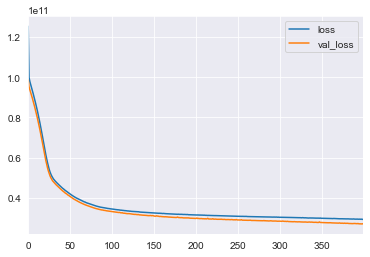

In [86]:
# then plot the losses
# this is a good outcome - the training loss pairs well with the validation loss.
# since the validation_loss didn't rise we could have continued training.
# while 400 epochs seems a sensible value because the loss is stabilizing, lack of a val_loss rise indicates we aren't 
# overfitting yet. 
# if the val_loss had risen, indicating overfitting, we could implement 'early stopping'
lossdf.plot()

In [88]:
# import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [89]:
# grab predictions from test set
predictions = model.predict(X_test)

In [91]:
# get Mean Squared Error
# now we can compare them to what we know are the correct values
# y_true=y_test
# the value is large because we're squaring the price of houses, so it makes sense that this is large
mean_squared_error(y_test, predictions)

27187964690.1321

In [92]:
# Get Root Mean Squared Error
np.sqrt(mean_squared_error(y_test, predictions))

164887.7335951104

In [93]:
# get Mean Absolute Error
# easy to interpret - 'what's the average absolute error across all the predictions?'
# in this case we're off by about 100k
mean_absolute_error(y_test, predictions)

102443.46227454668

In [94]:
# is this error good or bad for the model's predictability?
# check the original dataframe stats
# average house price is around 540k, so 102k is about %18 of the average - not a great swing
df.price.describe()

count     21597.00
mean     540296.57
std      367368.14
min       78000.00
25%      322000.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

In [95]:
# try to use an explained variance score to get a deeper understanding of the metrics
# this describes how much variance is being explained by the actual model
# Best possible score is 1.0, lower values are worse.
# In this case - we're around 80%, which is ok. 
# the question to ask is "do we have a previous or different model that performs better?"
# Since it's possible in this case to continue training, adding epochs may result in a better explained variance
# and a better swing to mean value
explained_variance_score(y_test,predictions)

0.7956547235952586

In [96]:
# with 800 epochs
model.fit(x=X_train,y=y_train, validation_data=(X_test, y_test),
         batch_size=128
         , epochs=800)

Epoch 1/800
119/119 [==============================] - 0s 2ms/step - loss: 29334847488.0000 - val_loss: 27156815872.0000
Epoch 2/800
119/119 [==============================] - 0s 1ms/step - loss: 29367304192.0000 - val_loss: 27088920576.0000
Epoch 3/800
119/119 [==============================] - 0s 2ms/step - loss: 29343889408.0000 - val_loss: 27042443264.0000
Epoch 4/800
119/119 [==============================] - 0s 2ms/step - loss: 29345576960.0000 - val_loss: 27039375360.0000
Epoch 5/800
119/119 [==============================] - 0s 2ms/step - loss: 29325127680.0000 - val_loss: 27045394432.0000
Epoch 6/800
119/119 [==============================] - 0s 2ms/step - loss: 29302564864.0000 - val_loss: 27040356352.0000
Epoch 7/800
119/119 [==============================] - 0s 2ms/step - loss: 29311389696.0000 - val_loss: 27043323904.0000
Epoch 8/800
119/119 [==============================] - 0s 2ms/step - loss: 29281732608.0000 - val_loss: 27010981888.0000
Epoch 9/800
119/119 [===========

119/119 [==============================] - 0s 1ms/step - loss: 28744472576.0000 - val_loss: 26340808704.0000
Epoch 69/800
119/119 [==============================] - 0s 1ms/step - loss: 28699289600.0000 - val_loss: 26272647168.0000
Epoch 70/800
119/119 [==============================] - 0s 1ms/step - loss: 28727945216.0000 - val_loss: 26313007104.0000
Epoch 71/800
119/119 [==============================] - 0s 2ms/step - loss: 28681099264.0000 - val_loss: 26276861952.0000
Epoch 72/800
119/119 [==============================] - 0s 2ms/step - loss: 28691347456.0000 - val_loss: 26353707008.0000
Epoch 73/800
119/119 [==============================] - 0s 2ms/step - loss: 28726054912.0000 - val_loss: 26242002944.0000
Epoch 74/800
119/119 [==============================] - 0s 2ms/step - loss: 28658925568.0000 - val_loss: 26224533504.0000
Epoch 75/800
119/119 [==============================] - 0s 2ms/step - loss: 28687769600.0000 - val_loss: 26348746752.0000
Epoch 76/800
119/119 [===============

Epoch 135/800
119/119 [==============================] - 0s 1ms/step - loss: 28055527424.0000 - val_loss: 25518125056.0000
Epoch 136/800
119/119 [==============================] - 0s 1ms/step - loss: 28076957696.0000 - val_loss: 25547577344.0000
Epoch 137/800
119/119 [==============================] - 0s 1ms/step - loss: 28064784384.0000 - val_loss: 25498265600.0000
Epoch 138/800
119/119 [==============================] - 0s 1ms/step - loss: 28120281088.0000 - val_loss: 25514989568.0000
Epoch 139/800
119/119 [==============================] - 0s 1ms/step - loss: 28021925888.0000 - val_loss: 25523367936.0000
Epoch 140/800
119/119 [==============================] - 0s 1ms/step - loss: 28010717184.0000 - val_loss: 25496096768.0000
Epoch 141/800
119/119 [==============================] - 0s 1ms/step - loss: 28036659200.0000 - val_loss: 25535533056.0000
Epoch 142/800
119/119 [==============================] - 0s 1ms/step - loss: 28010029056.0000 - val_loss: 25446144000.0000
Epoch 143/800
11

119/119 [==============================] - 0s 1ms/step - loss: 27573125120.0000 - val_loss: 25056751616.0000
Epoch 202/800
119/119 [==============================] - 0s 1ms/step - loss: 27553576960.0000 - val_loss: 24990420992.0000
Epoch 203/800
119/119 [==============================] - 0s 1ms/step - loss: 27537956864.0000 - val_loss: 24972376064.0000
Epoch 204/800
119/119 [==============================] - 0s 1ms/step - loss: 27551346688.0000 - val_loss: 25043218432.0000
Epoch 205/800
119/119 [==============================] - 0s 1ms/step - loss: 27523231744.0000 - val_loss: 25015103488.0000
Epoch 206/800
119/119 [==============================] - 0s 1ms/step - loss: 27483676672.0000 - val_loss: 25108695040.0000
Epoch 207/800
119/119 [==============================] - 0s 1ms/step - loss: 27497744384.0000 - val_loss: 24929482752.0000
Epoch 208/800
119/119 [==============================] - 0s 1ms/step - loss: 27528304640.0000 - val_loss: 24932960256.0000
Epoch 209/800
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 27155988480.0000 - val_loss: 24666163200.0000
Epoch 268/800
119/119 [==============================] - 0s 1ms/step - loss: 27144443904.0000 - val_loss: 24666867712.0000
Epoch 269/800
119/119 [==============================] - 0s 1ms/step - loss: 27126517760.0000 - val_loss: 24657463296.0000
Epoch 270/800
119/119 [==============================] - 0s 1ms/step - loss: 27150895104.0000 - val_loss: 24730753024.0000
Epoch 271/800
119/119 [==============================] - 0s 1ms/step - loss: 27165876224.0000 - val_loss: 24622811136.0000
Epoch 272/800
119/119 [==============================] - 0s 1ms/step - loss: 27112941568.0000 - val_loss: 24653707264.0000
Epoch 273/800
119/119 [==============================] - 0s 1ms/step - loss: 27083843584.0000 - val_loss: 24671033344.0000
Epoch 274/800
119/119 [==============================] - 0s 1ms/step - loss: 27115501568.0000 - val_loss: 24626137088.0000
Epoch 275/800
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 26827802624.0000 - val_loss: 24345606144.0000
Epoch 334/800
119/119 [==============================] - 0s 1ms/step - loss: 26839846912.0000 - val_loss: 24346132480.0000
Epoch 335/800
119/119 [==============================] - 0s 1ms/step - loss: 26792804352.0000 - val_loss: 24357548032.0000
Epoch 336/800
119/119 [==============================] - 0s 1ms/step - loss: 26783963136.0000 - val_loss: 24346017792.0000
Epoch 337/800
119/119 [==============================] - 0s 2ms/step - loss: 26932115456.0000 - val_loss: 24419874816.0000
Epoch 338/800
119/119 [==============================] - 0s 2ms/step - loss: 26784835584.0000 - val_loss: 24377581568.0000
Epoch 339/800
119/119 [==============================] - 0s 1ms/step - loss: 26761713664.0000 - val_loss: 24454662144.0000
Epoch 340/800
119/119 [==============================] - 0s 1ms/step - loss: 26763233280.0000 - val_loss: 24407136256.0000
Epoch 341/800
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 26534899712.0000 - val_loss: 24077369344.0000
Epoch 400/800
119/119 [==============================] - 0s 1ms/step - loss: 26480146432.0000 - val_loss: 24111321088.0000
Epoch 401/800
119/119 [==============================] - 0s 1ms/step - loss: 26534588416.0000 - val_loss: 24070168576.0000
Epoch 402/800
119/119 [==============================] - 0s 1ms/step - loss: 26517227520.0000 - val_loss: 24045465600.0000
Epoch 403/800
119/119 [==============================] - 0s 1ms/step - loss: 26498117632.0000 - val_loss: 24075638784.0000
Epoch 404/800
119/119 [==============================] - 0s 1ms/step - loss: 26494857216.0000 - val_loss: 24056225792.0000
Epoch 405/800
119/119 [==============================] - 0s 1ms/step - loss: 26482407424.0000 - val_loss: 24041527296.0000
Epoch 406/800
119/119 [==============================] - 0s 1ms/step - loss: 26473484288.0000 - val_loss: 24078008320.0000
Epoch 407/800
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 26000166912.0000 - val_loss: 23660496896.0000
Epoch 466/800
119/119 [==============================] - 0s 1ms/step - loss: 26036811776.0000 - val_loss: 23549310976.0000
Epoch 467/800
119/119 [==============================] - 0s 1ms/step - loss: 25982205952.0000 - val_loss: 23604439040.0000
Epoch 468/800
119/119 [==============================] - 0s 1ms/step - loss: 25991892992.0000 - val_loss: 23656077312.0000
Epoch 469/800
119/119 [==============================] - 0s 1ms/step - loss: 25947303936.0000 - val_loss: 23515318272.0000
Epoch 470/800
119/119 [==============================] - 0s 1ms/step - loss: 25955657728.0000 - val_loss: 23494518784.0000
Epoch 471/800
119/119 [==============================] - 0s 1ms/step - loss: 25956476928.0000 - val_loss: 23523506176.0000
Epoch 472/800
119/119 [==============================] - 0s 1ms/step - loss: 25929748480.0000 - val_loss: 23465986048.0000
Epoch 473/800
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 24465160192.0000 - val_loss: 22200635392.0000
Epoch 532/800
119/119 [==============================] - 0s 1ms/step - loss: 24428124160.0000 - val_loss: 22147573760.0000
Epoch 533/800
119/119 [==============================] - 0s 1ms/step - loss: 24377253888.0000 - val_loss: 22249486336.0000
Epoch 534/800
119/119 [==============================] - 0s 1ms/step - loss: 24367294464.0000 - val_loss: 22108065792.0000
Epoch 535/800
119/119 [==============================] - 0s 1ms/step - loss: 24301635584.0000 - val_loss: 22074826752.0000
Epoch 536/800
119/119 [==============================] - 0s 2ms/step - loss: 24302184448.0000 - val_loss: 22050836480.0000
Epoch 537/800
119/119 [==============================] - 0s 1ms/step - loss: 24279093248.0000 - val_loss: 22063286272.0000
Epoch 538/800
119/119 [==============================] - 0s 1ms/step - loss: 24223145984.0000 - val_loss: 21976950784.0000
Epoch 539/800
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 22054838272.0000 - val_loss: 19999227904.0000
Epoch 598/800
119/119 [==============================] - 0s 1ms/step - loss: 21961521152.0000 - val_loss: 20035051520.0000
Epoch 599/800
119/119 [==============================] - 0s 2ms/step - loss: 21945198592.0000 - val_loss: 19932995584.0000
Epoch 600/800
119/119 [==============================] - 0s 2ms/step - loss: 21931601920.0000 - val_loss: 19918530560.0000
Epoch 601/800
119/119 [==============================] - 0s 2ms/step - loss: 21884264448.0000 - val_loss: 19838830592.0000
Epoch 602/800
119/119 [==============================] - 0s 2ms/step - loss: 21828954112.0000 - val_loss: 19847180288.0000
Epoch 603/800
119/119 [==============================] - 0s 1ms/step - loss: 21799550976.0000 - val_loss: 19803267072.0000
Epoch 604/800
119/119 [==============================] - 0s 1ms/step - loss: 21733482496.0000 - val_loss: 19773790208.0000
Epoch 605/800
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 20198602752.0000 - val_loss: 18656657408.0000
Epoch 664/800
119/119 [==============================] - 0s 1ms/step - loss: 20154220544.0000 - val_loss: 18813741056.0000
Epoch 665/800
119/119 [==============================] - 0s 1ms/step - loss: 20157892608.0000 - val_loss: 18730399744.0000
Epoch 666/800
119/119 [==============================] - 0s 1ms/step - loss: 20149192704.0000 - val_loss: 18649794560.0000
Epoch 667/800
119/119 [==============================] - 0s 2ms/step - loss: 20101345280.0000 - val_loss: 18588608512.0000
Epoch 668/800
119/119 [==============================] - 0s 1ms/step - loss: 20087422976.0000 - val_loss: 18564016128.0000
Epoch 669/800
119/119 [==============================] - 0s 1ms/step - loss: 20062089216.0000 - val_loss: 18651428864.0000
Epoch 670/800
119/119 [==============================] - 0s 1ms/step - loss: 20057096192.0000 - val_loss: 18558248960.0000
Epoch 671/800
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 19141302272.0000 - val_loss: 18122917888.0000
Epoch 730/800
119/119 [==============================] - 0s 2ms/step - loss: 19082149888.0000 - val_loss: 18041354240.0000
Epoch 731/800
119/119 [==============================] - 0s 1ms/step - loss: 19071584256.0000 - val_loss: 18187696128.0000
Epoch 732/800
119/119 [==============================] - 0s 1ms/step - loss: 19033335808.0000 - val_loss: 18009421824.0000
Epoch 733/800
119/119 [==============================] - 0s 1ms/step - loss: 19087153152.0000 - val_loss: 18000560128.0000
Epoch 734/800
119/119 [==============================] - 0s 1ms/step - loss: 18974435328.0000 - val_loss: 18061213696.0000
Epoch 735/800
119/119 [==============================] - 0s 1ms/step - loss: 18977683456.0000 - val_loss: 17985157120.0000
Epoch 736/800
119/119 [==============================] - 0s 1ms/step - loss: 19035766784.0000 - val_loss: 18089472000.0000
Epoch 737/800
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 18291046400.0000 - val_loss: 17634793472.0000
Epoch 796/800
119/119 [==============================] - 0s 2ms/step - loss: 18266556416.0000 - val_loss: 17694646272.0000
Epoch 797/800
119/119 [==============================] - 0s 2ms/step - loss: 18324602880.0000 - val_loss: 17654097920.0000
Epoch 798/800
119/119 [==============================] - 0s 2ms/step - loss: 18289963008.0000 - val_loss: 17618274304.0000
Epoch 799/800
119/119 [==============================] - 0s 2ms/step - loss: 18284419072.0000 - val_loss: 17669007360.0000
Epoch 800/800
119/119 [==============================] - 0s 2ms/step - loss: 18253342720.0000 - val_loss: 17632296960.0000


In [99]:
lossdf2 = pd.DataFrame(model.history.history)

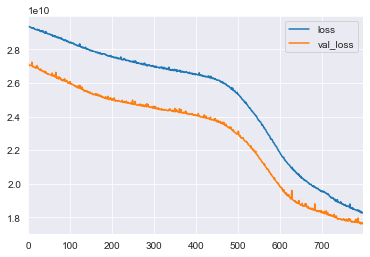

In [100]:
# this still appears valid since val_loss doesn't rise. Could stand for more epochs
lossdf2.plot()

In [102]:
predictions2 = model.predict(X_test)
mse2 = mean_squared_error(y_test, predictions2)
rmse2 = np.sqrt(mean_squared_error(y_test, predictions2))
mae2 = mean_absolute_error(y_test, predictions2)
evs2 = explained_variance_score(y_test,predictions2)

In [104]:
print('MAE:',mae2)
print('MSE:',mse2)
print('RMSE:',rmse2)
print('Explained Variance',evs2)

MAE: 77833.69112774884
MSE: 17632295872.36786
RMSE: 132786.6554754952
Explained Variance 0.8670868287717447


In [109]:
# down to a 77k swing which is 14.4% of median. An improvement!
mae2 / df.price.describe()['mean'] 

0.1440573472875172

In [110]:
# with 1200 epochs - setting verbose=0 to quash output
model.fit(x=X_train,y=y_train, validation_data=(X_test, y_test),
         batch_size=128
         , epochs=1200,verbose=0)


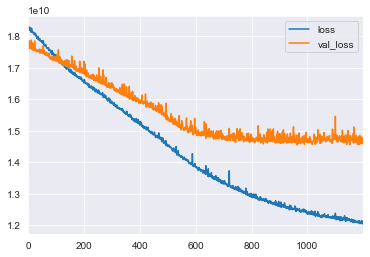

In [111]:
# here val_loss has diverged and we're overfitting. Oddly we cross the line at around 100 epochs in this test
# the last test 800 showed no overfitting.
lossdf3 = pd.DataFrame(model.history.history)
lossdf3.plot()

In [112]:
# these numbers aren't meaningful anymore since the data is overfitted
predictions3 = model.predict(X_test)
mse3 = mean_squared_error(y_test, predictions3)
rmse3 = np.sqrt(mean_squared_error(y_test, predictions3))
mae3 = mean_absolute_error(y_test, predictions3)
evs3 = explained_variance_score(y_test,predictions3)
swing3 = mae3 / df.price.describe()['mean'] 
print('MAE:',mae3)
print('MSE:',mse3)
print('RMSE:',rmse3)
print('Explained Variance',evs3)
print('Swing',swing3)

MAE: 72781.14684606482
MSE: 14727130661.67133
RMSE: 121355.38991602858
Explained Variance 0.8895805771780269
Swing 0.13470591970228962


In [113]:
# lets reset the model
model = Sequential()
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1)) # final output layer to deliver 'price'
# using adam for the optimizer. since this is a regression use mean squared as the loss function
model.compile(optimizer='adam',loss='mse') # compile with optimizer and loss function

In [114]:
model.fit(x=X_train,y=y_train, validation_data=(X_test, y_test),
         batch_size=128
         , epochs=800,verbose=0)

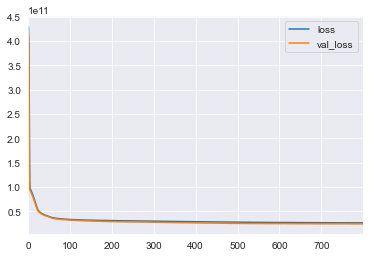

In [115]:
lossdf2 = pd.DataFrame(model.history.history)
lossdf2.plot()

In [116]:
predictions2 = model.predict(X_test)
mse2 = mean_squared_error(y_test, predictions2)
rmse2 = np.sqrt(mean_squared_error(y_test, predictions2))
mae2 = mean_absolute_error(y_test, predictions2)
evs2 = explained_variance_score(y_test,predictions2)
swing2 = mae2 / df.price.describe()['mean'] 
print("Mean", df.price.describe()['mean'])
print('MAE:',mae2)
print('MSE:',mse2)
print('RMSE:',rmse2)
print('Explained Variance',evs2)
print('Swing',swing2)

Mean 540296.5735055795
MAE: 97167.49987943673
MSE: 24282574222.42577
RMSE: 155828.66944957775
Explained Variance 0.816908353960932
Swing 0.1798410440565811


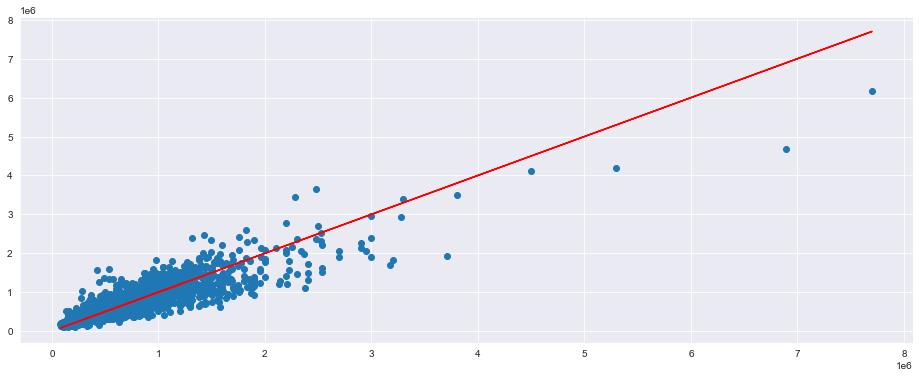

In [123]:
# show scatterplot with optimal prediction line
# The outliers punish the perfect fit
# but this is very good at predicting values below $2million
# it could be useful to retrain the model just on the bottom 99% (<$3million). 
# this allows us to qualify that the model product is optimal within a certain range 
# and less predictive above ($3million+)
plt.figure(figsize=(16,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

### Now use the model to predict for a new house - new data

In [124]:
# grab the first house and drop the price (we're predicting the price) to get the features
df.drop('price',axis=1).iloc[0]

bedrooms              3
bathrooms          1.00
sqft_living        1180
sqft_lot           5650
floors             1.00
waterfront            0
view                  0
condition             3
grade                 7
sqft_above         1180
sqft_basement         0
yr_built           1955
yr_renovated          0
lat               47.51
long            -122.26
sqft_living15      1340
sqft_lot15         5650
year               2014
month                10
renovated         False
Name: 0, dtype: object

In [125]:
single_house = df.drop('price',axis=1).iloc[0]

In [129]:
# our model is trained on Scaled versions of the features, not the raw features themselves.
print(len(single_house.values))
single_house.values

20


array([3, 1.0, 1180, 5650, 1.0, 0, 0, 3, 7, 1180, 0, 1955, 0, 47.5112,
       -122.257, 1340, 5650, 2014, 10, False], dtype=object)

In [130]:
# reshape this to add another set of interior brackets, which is what is expected by the scaler
# -1 means 'keep old dimensions along the axis'
single_house.values.reshape(-1,20)

array([[3, 1.0, 1180, 5650, 1.0, 0, 0, 3, 7, 1180, 0, 1955, 0, 47.5112,
        -122.257, 1340, 5650, 2014, 10, False]], dtype=object)

In [131]:
# run through the scaler
single_house = scaler.transform(single_house.values.reshape(-1,20))

In [132]:
# now make a price prediction
model.predict(single_house)

array([[282142.03]], dtype=float32)

In [134]:
single_house_predict = model.predict(single_house)

In [136]:
# the actual price
single_house_actual = df['price'].iloc[0]

In [141]:
# the model overshoots the value by 78%. Might need to retrain
print('swing percentage',single_house_actual / single_house_predict)
print('difference', single_house_predict - single_house_actual)

swing percentage [[0.7864833]]
difference [[60242.03]]
